In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df_data = pd.read_csv("C:/DAY1_vr3_0_0/ks-projects-201801.csv")[['goal','pledged','state','backers','usd pledged','usd_pledged_real','usd_goal_real']]

In [5]:
df_data['state'] = df_data['state'] == "successful"

In [6]:
display(df_data.head())
df_data.describe()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000.0,0.0,False,0,0.0,0.0,1533.95
1,30000.0,2421.0,False,15,100.0,2421.0,30000.00
2,45000.0,220.0,False,3,220.0,220.0,45000.00
3,5000.0,1.0,False,1,1.0,1.0,5000.00
4,19500.0,1283.0,False,14,1283.0,1283.0,19500.00


,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 7 columns):
goal                378661 non-null float64
pledged             378661 non-null float64
state               378661 non-null bool
backers             378661 non-null int64
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: bool(1), float64(5), int64(1)
memory usage: 17.7 MB


In [8]:
# 相関係数を確認
df_data.corr()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
goal,1.000000,0.007358,-0.024332,0.004012,0.005534,0.005104,0.942692
pledged,0.007358,1.000000,0.111534,0.717079,0.857370,0.952843,0.005024
state,-0.024332,0.111534,1.000000,0.129109,0.097791,0.110704,-0.023052
backers,0.004012,0.717079,0.129109,1.000000,0.697426,0.752539,0.004517
usd pledged,0.005534,0.857370,0.097791,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,0.005104,0.952843,0.110704,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.942692,0.005024,-0.023052,0.004517,0.006172,0.005596,1.000000


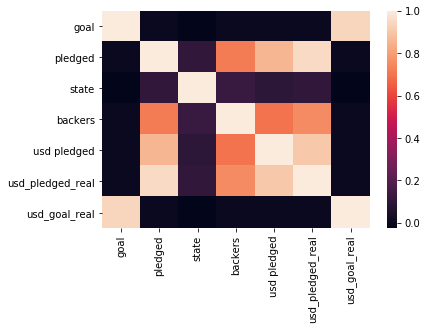

In [9]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_data.corr())
plt.show()

In [10]:
y = df_data["state"].values


In [11]:
df_col=['state','usd pledged','usd_pledged_real','usd_goal_real']

In [12]:
X = df_data.drop(df_col, axis=1).values

In [13]:
X.ndim

2

In [14]:
X.shape

(378661, 3)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)


In [20]:
from sklearn.linear_model import LogisticRegression
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
clf.predict
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))

w0 = 683.130, w1 = -67290.567, w2 = 67188.535, w3 = 5616.228


In [25]:
# ラベルを予測
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
# 正答率を計算
accuracy =  accuracy_score(y_train, y_train_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))
# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred)
# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 98.878%
適合率（Precision） = 99.484%
再現率（Recall） = 98.774%
F1値（F1-score） = 99.128%


In [26]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat = pd.DataFrame(conf_mat,index=['成功', '失敗'],columns=['成功', '失敗'])
conf_mat

,成功,失敗
成功,193106,2397
失敗,1002,106423


In [27]:
# 正答率を計算
accuracy_val =  accuracy_score(y_val, y_val_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy_val))
# Precision, Recall, F1-scoreを計算
precision_val, recall_val, f1_score_val, _ = precision_recall_fscore_support(y_val, y_val_pred)
# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision_val[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall_val[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score_val[0]))

正答率（Accuracy） = 98.893%
適合率（Precision） = 99.470%
再現率（Recall） = 98.823%
F1値（F1-score） = 99.146%
